In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
test_predictions_path = 'test_predictions.xlsx'
utm_predictions_path = 'UTM_predictions.xlsx'


In [3]:
test_predictions = pd.read_excel(test_predictions_path)
test_predictions['DateTime'] = pd.to_datetime(test_predictions['DateTime'])

utm_predictions = pd.read_excel(utm_predictions_path)
utm_predictions['DateTime'] = pd.to_datetime(utm_predictions['DateTime'])

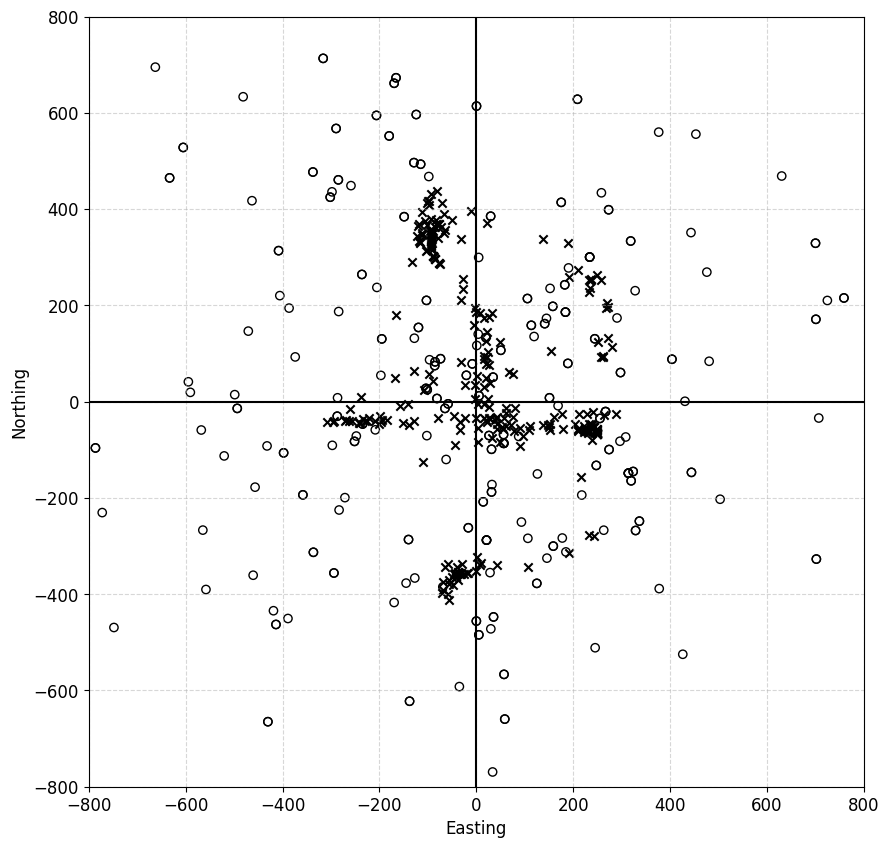

In [4]:
# Plot of the error on a tower by tower basis

plt.rcdefaults()  # Reset the style to default

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(test_predictions['xOffset'], test_predictions['yOffset'], marker='o', color='black', facecolors='none', edgecolors='black')
ax.scatter(test_predictions['xOffset_pred'], test_predictions['yOffset_pred'], marker='x', color='black')
ax.set_xlabel('Easting')
ax.set_ylabel('Northing')

# Adjust the font sizes for better visibility
ax.tick_params(axis='both', which='both', labelsize=12)

# Adjust the axis labels font size
ax.xaxis.label.set_fontsize(12)
ax.yaxis.label.set_fontsize(12)

# Add horizontal and vertical grid
ax.grid(True, linestyle='--', alpha=0.5)

# Make the lines that go through 0 solid and thicker
ax.axhline(0, color='black', linewidth=1.5)
ax.axvline(0, color='black', linewidth=1.5)

# Set the background color to white
ax.set_facecolor('white')

# Set the maximum x and y distance
ax.set_xlim(-800, 800)
ax.set_ylim(-800, 800)

# Save the figure with high resolution (300 dpi)
# plt.savefig('predicted_vs_actual_locations.png', dpi=300, bbox_inches='tight')

plt.show()


In [7]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.diagnostic as diagnostic

# Assuming 'utm_predictions' is the DataFrame containing the data

# Define the model formula
formula = 'error_m ~ mean_distance_from_tower + Tower_count + Data_type + pulse_count'

# Fit the ANCOVA model
model = smf.ols(formula, data=utm_predictions)
results = model.fit()

# Print the summary of the model
print(results.summary())

# Perform assumptions tests

# 2. Homoscedasticity (Breusch-Pagan test)
breusch_pagan_test = diagnostic.het_breuschpagan(residuals, results.model.exog)
print("\nBreusch-Pagan test (Homoscedasticity):")
print("LM Statistic:", breusch_pagan_test[0])
print("LM p-value:", breusch_pagan_test[1])
print("F-statistic:", breusch_pagan_test[2])
print("F p-value:", breusch_pagan_test[3])





                            OLS Regression Results                            
Dep. Variable:                error_m   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     19.58
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           5.91e-12
Time:                        19:59:42   Log-Likelihood:                -663.67
No. Observations:                 106   AIC:                             1337.
Df Residuals:                     101   BIC:                             1351.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

                            OLS Regression Results                            
Dep. Variable:                error_m   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     19.58
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           5.91e-12
Time:                        19:43:57   Log-Likelihood:                -663.67
No. Observations:                 106   AIC:                             1337.
Df Residuals:                     101   BIC:                             1351.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [7]:
from scipy import stats

# Perform one-way ANOVA test
data_types = utm_predictions['Data_type'].unique()
groups = [utm_predictions[utm_predictions['Data_type'] == data_type]['error_m'] for data_type in data_types]
f_statistic, p_value = stats.f_oneway(*groups)

# Calculate mean values for each group
group_means = [group.mean() for group in groups]

# Calculate sample sizes for each group
sample_sizes = [len(group) for group in groups]

# Calculate confidence intervals for each group (95% confidence level)
confidence_intervals = [stats.t.interval(0.95, len(group)-1, loc=mean, scale=stats.sem(group))
                        for group, mean in zip(groups, group_means)]

# Calculate overall mean and confidence interval
overall_mean = utm_predictions['error_m'].mean()
overall_confidence_interval = stats.t.interval(0.95, len(utm_predictions)-1, loc=overall_mean, scale=stats.sem(utm_predictions['distance']))

# Print the results
print("One-way ANOVA test:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)
print("\nGroup Means with Confidence Intervals (95% confidence level) and Sample Sizes:")
for i, data_type in enumerate(data_types):
    lower_bound, upper_bound = confidence_intervals[i]
    print(f"{data_type}: Mean = {group_means[i]}, Confidence Interval = ±{upper_bound - group_means[i]}, Sample Size = {sample_sizes[i]}")
    print(f"\t\t\t\t\t\t\t\t\t\t\t\t\t  ({lower_bound}, {upper_bound})")
print("\nOverall Mean with Confidence Interval (95% confidence level):")
lower_bound, upper_bound = overall_confidence_interval
print(f"Overall Mean = {overall_mean}, Confidence Interval = ±{upper_bound - overall_mean}")
print(f"\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t  ({lower_bound}, {upper_bound})")


One-way ANOVA test:
F-statistic: 1.5517740094714054
p-value: 0.21567284023359826

Group Means with Confidence Intervals (95% confidence level) and Sample Sizes:
BTFS: Mean = 271.02405382911314, Confidence Interval = ±92.88657617342955, Sample Size = 17
													  (178.13747765568363, 363.9106300025427)
Simulated BTFS: Mean = 215.222986351245, Confidence Interval = ±35.19495470105525, Sample Size = 89
													  (180.02803165018975, 250.41794105230025)

Overall Mean with Confidence Interval (95% confidence level):
Overall Mean = 224.17221415429935, Confidence Interval = ±32.67850979208117
																  (191.4937043622182, 256.8507239463805)


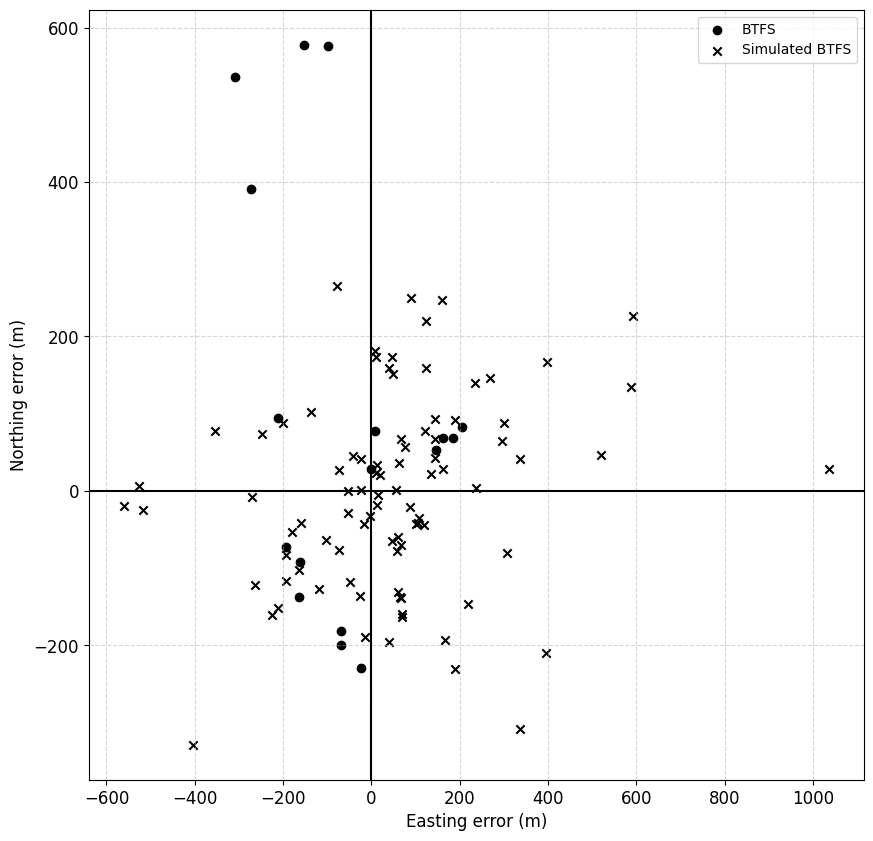

In [8]:
# Plot of the error on a tower by tower basis

unique_data_types = utm_predictions['Data_type'].unique()
point_markers = ['o', 'x', 's', 'D', '^', 'v', 'p', 'h']

plt.rcdefaults()  # Reset the style to default

fig, ax = plt.subplots(figsize=(10, 10))

for i, data_type in enumerate(unique_data_types):
    data_type_df = utm_predictions[utm_predictions['Data_type'] == data_type]
    marker = point_markers[i % len(point_markers)]
    ax.scatter(data_type_df['easting_error'], data_type_df['northing_error'], marker=marker, color='black', label=data_type)

ax.set_xlabel('Easting error (m)')
ax.set_ylabel('Northing error (m)')

# Adjust the font sizes for better visibility
ax.tick_params(axis='both', which='both', labelsize=12)

# Adjust the axis labels font size
ax.xaxis.label.set_fontsize(12)
ax.yaxis.label.set_fontsize(12)

# Add horizontal and vertical grid
ax.grid(True, linestyle='--', alpha=0.5)

# Make the lines that go through 0 solid and thicker
ax.axhline(0, color='black', linewidth=1.5)
ax.axvline(0, color='black', linewidth=1.5)

# Set the background color to white
ax.set_facecolor('white')

# Set the maximum x and y distance
# ax.set_xlim(-800, 800)
# ax.set_ylim(-800, 800)

# Add legend
ax.legend()

# Save the figure with high resolution (300 dpi)
# plt.savefig('predicted_vs_actual_locations.png', dpi=300, bbox_inches='tight')

plt.show()


In [9]:
simulated_BTFS


NameError: name 'simulated_BTFS' is not defined

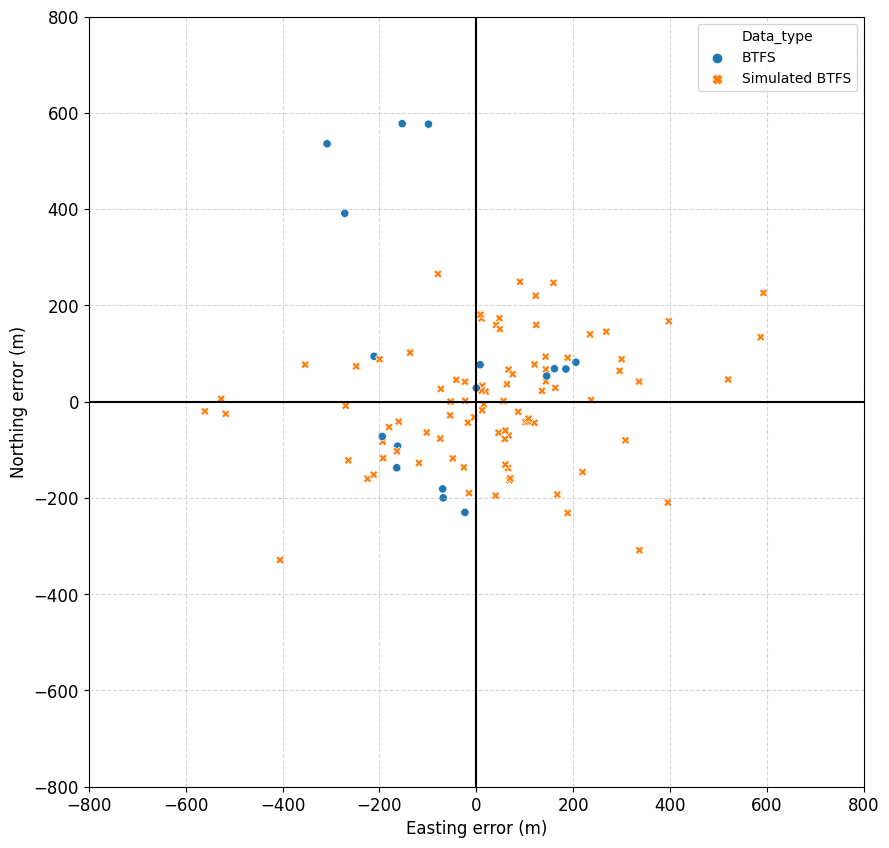

In [ ]:
# Plot of overall error of points
plt.rcdefaults()  # Reset the style to default

fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=utm_predictions, x='easting_error', y='northing_error', hue='Data_type', style='Data_type', marker='o')

ax.set_xlabel('Easting error (m)')
ax.set_ylabel('Northing error (m)')

# Adjust the font sizes for better visibility
ax.tick_params(axis='both', which='both', labelsize=12)

# Adjust the axis labels font size
ax.xaxis.label.set_fontsize(12)
ax.yaxis.label.set_fontsize(12)

# Add horizontal and vertical grid
ax.grid(True, linestyle='--', alpha=0.5)

# Make the lines that go through 0 solid and thicker
ax.axhline(0, color='black', linewidth=1.5)
ax.axvline(0, color='black', linewidth=1.5)

# Set the background color to white
ax.set_facecolor('white')

# Set the maximum x and y distance
ax.set_xlim(-800, 800)
ax.set_ylim(-800, 800)

# Save the figure with high resolution (300 dpi)
# plt.savefig('predicted_vs_actual_locations.png', dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
# Plot the distribution of the errors
def plot_error_distribution(distances):
    fig, ax = plt.subplots()
    ax.boxplot(distances)
    ax.set_ylabel('Distance (m)')
    ax.set_title('Distribution of errors')
    plt.show()

plot_error_distribution(UTM_predictions['distance'])

NameError: name 'UTM_predictions' is not defined